Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7308 - loss: 0.6201 - val_accuracy: 0.7253 - val_loss: 0.6224
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8077 - loss: 0.5539 - val_accuracy: 0.7802 - val_loss: 0.5726
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8571 - loss: 0.5078 - val_accuracy: 0.8352 - val_loss: 0.5346
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8736 - loss: 0.4717 - val_accuracy: 0.8571 - val_loss: 0.5015
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8874 - loss: 0.4419 - val_accuracy: 0.8571 - val_loss: 0.4724
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8984 - loss: 0.4159 - val_accuracy: 0.8571 - val_loss: 0.4462
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9038 - loss: 0.3928 - val_accuracy: 0.8791 - val_loss: 0.4230
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9038 - loss: 0.3724 - val_accuracy: 0.8791 - v

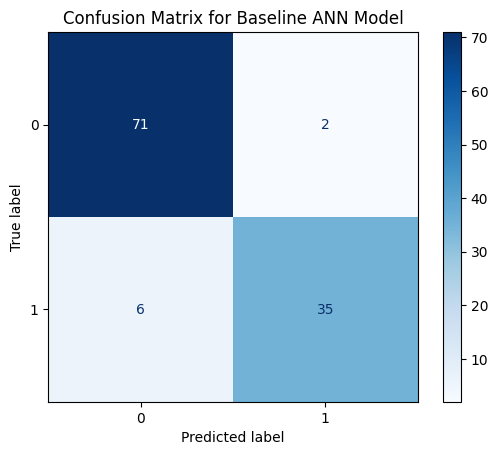

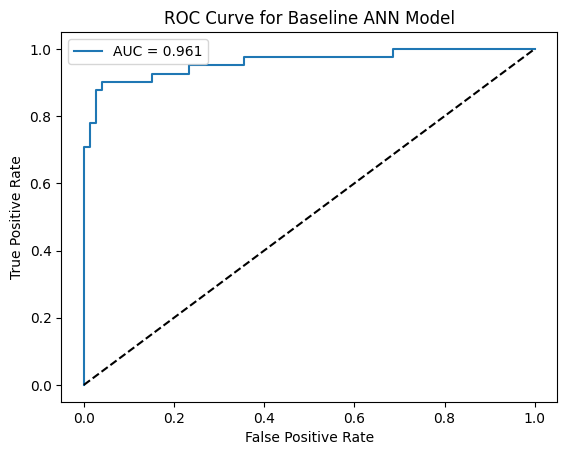

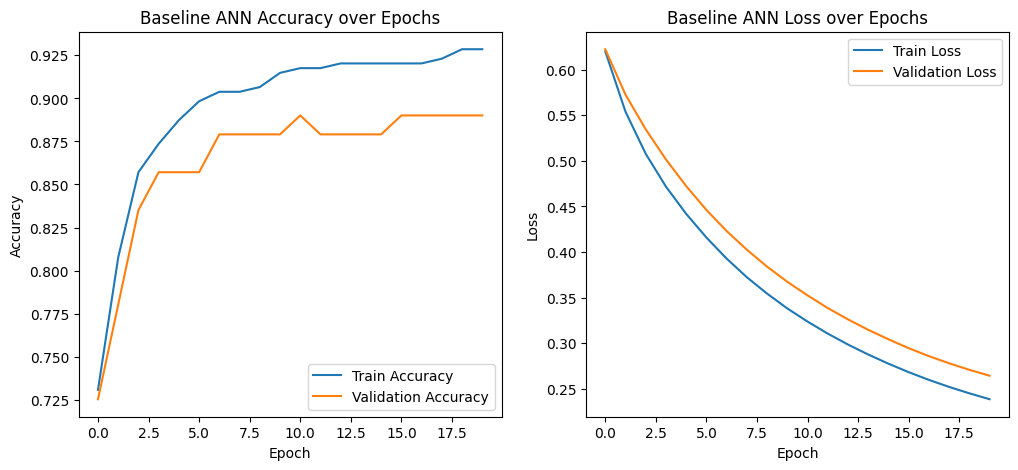

Epoch 1/100


c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3764 - loss: 0.7671 - val_accuracy: 0.5165 - val_loss: 0.6705
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7225 - loss: 0.6092 - val_accuracy: 0.8791 - val_loss: 0.5355
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8901 - loss: 0.4941 - val_accuracy: 0.9231 - val_loss: 0.4487
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9148 - loss: 0.4182 - val_accuracy: 0.9670 - val_loss: 0.3726
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9231 - loss: 0.3478 - val_accuracy: 0.9670 - val_loss: 0.3074
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9423 - loss: 0.2810 - val_accuracy: 0.9670 - val_loss: 0.2460
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9478 - loss: 0.2359 - val_accuracy: 0.9670 - val_loss: 0.1977
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9423 - loss: 0.2068 - val_accuracy: 0.9560 - val_loss: 

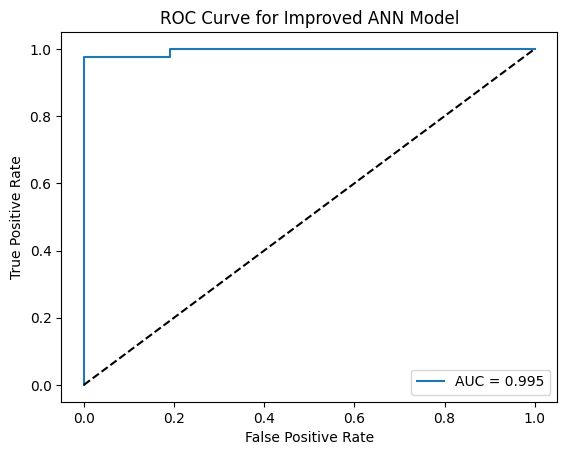

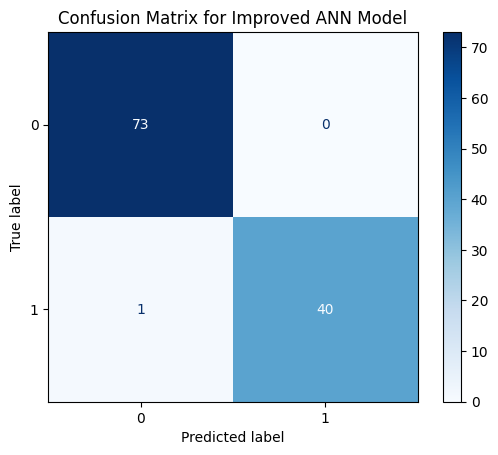

In [ ]:
#Import the various python modules to be used in the analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Link to where this code is uploaded to: 

#Step 1: Data Collection
url = "https://raw.githubusercontent.com/uciml/breast-cancer-wisconsin-data/master/data.csv"
df = pd.read_csv("data.csv")

#Viewing the top 5 rows to gain an understanding of the dataset
df.head()

#Step 2: Preprocessing
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

#Normalizing the features/attributes to ensure they are evenly weighted 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the data into training and testing sets using the 80/20 rule
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=14)

#Step 3: Model Building (Baseline ANN)
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  
    tf.keras.layers.Dense(8, activation='relu'),       
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compiling the baseline model with a weaker optimizer
baseline_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

#Step 4: Training the Baseline Model
history = baseline_model.fit(
    X_train, y_train,
    validation_split=0.2,  
    epochs=20,            
    batch_size=32,         
    verbose=1
)

#Step 5: Evaluation of the Baseline Model
y_pred_prob = baseline_model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

#Confusion Matrix and Classification Report
cf_baseline = confusion_matrix(y_test, y_pred)
crp_baseline = classification_report(y_test, y_pred, digits=3)
print("Baseline Model Report")
print(crp_baseline)
print("Confusion Matrix:\n", cf_baseline)

#Display Confusion Matrix
disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cf_baseline, display_labels=[0,1])
disp_baseline.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Baseline ANN Model")
plt.show()

#ROC Curve for Baseline Model
y_proba_baseline = y_pred_prob.flatten()
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_proba_baseline)
roc_auc_base = round(auc(fpr_base, tpr_base), 3)

plt.plot(fpr_base, tpr_base, label=f'AUC = {roc_auc_base}')
plt.plot([0,1],[0,1],'--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Baseline ANN Model')
plt.legend()
plt.show()

#Plot Training History (Accuracy & Loss) for Baseline
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline ANN Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Baseline ANN Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Step 6: Improvement (with Early Stopping and Stronger Model)
def improved_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Train the improved model with early stopping
improved = improved_model()
history_improved = improved.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate improved model
y_pred_prob_imp = improved.predict(X_test)
y_pred_imp = (y_pred_prob_imp >= 0.5).astype(int)
cf_imp = confusion_matrix(y_test, y_pred_imp)
crp_imp = classification_report(y_test, y_pred_imp, digits=3)
print("=== Improved Model Report ===")
print(crp_imp)
print("Confusion Matrix (Improved Model):\n", cf_imp)

# ROC Curve for Improved Model
y_proba_imp = y_pred_prob_imp.flatten()
fpr_imp, tpr_imp, thresholds_imp = roc_curve(y_test, y_proba_imp)
roc_auc_imp = round(auc(fpr_imp, tpr_imp), 3)

plt.plot(fpr_imp, tpr_imp, label=f'AUC = {roc_auc_imp}')
plt.plot([0,1],[0,1],'--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Improved ANN Model')
plt.legend()
plt.show()

# Display Confusion Matrix for Improved Model
disp_improved = ConfusionMatrixDisplay(confusion_matrix=cf_imp, display_labels=[0, 1])
disp_improved.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Improved ANN Model")
plt.show()